Replicating [this Applet](https://www2.stat.duke.edu/~berger/p-values.html).

termed the "p value fallacy," by which we
mean the misinterpretation of a p value as either a direct
frequentist error rate, the probability that the hypothesis is
true in light of the data, or a measure of odds of Ho to
H1. [The term "p value fallacy" was used, in the first of
these senses, in the excellent articles Goodman (1999a,b).]

In [ ]:
# Two Gaussian distributions:
mu <- 0
mu.alt <- 1

sd <- 1
sd.alt <- 3

# Sample size:
size <- 10

set.seed(pi)

# Num,ber of p-values within boundaries we decide to collect:
num <- 200

# p-value of interest:

pv <-  0.05
eps <- 0.001

# empty vector to contain desired p-values
vec <- vector()
# counter for how many draws are from H1:
prop.null <- vector()

while(length(vec) < num){
if(rbinom(1,1,0.5) == 0){ # Coin toss
  concl <- 'null'         # If 0, we draw sam from null distr.
  sam <- rnorm(size,mu,sd)
}else{
  concl <- 'alter'        # If 1 from H1 distr.
  sam <- rnorm(size, mu.alt, sd.alt)
}
prop.null <- append(prop.null, concl=='alter') # Add to counter if alternative.
z.test <- (mean(sam) - mu) / (sd/sqrt(size))
pval <- 1 - pnorm(abs(z.test))
if((pv - eps) < pval & pval < pv) vec <- append(vec, concl)
}

In [ ]:
paste('Therefore a p-value of ~ ', pv, 'corresponds to an alpha value of ', round(mean(prop.null), 2),'.')
length(prop.null)
length(vec)
table(vec)
mean(vec=='alter')

[1] "Therefore a p-value of ~  0.05 corresponds to an alpha value of  0.5 ."

[1] 108779

[1] 200

vec
alter  null 
   89   111 

[1] 0.445

[1] 20.17556

[1] 14

[1] 1

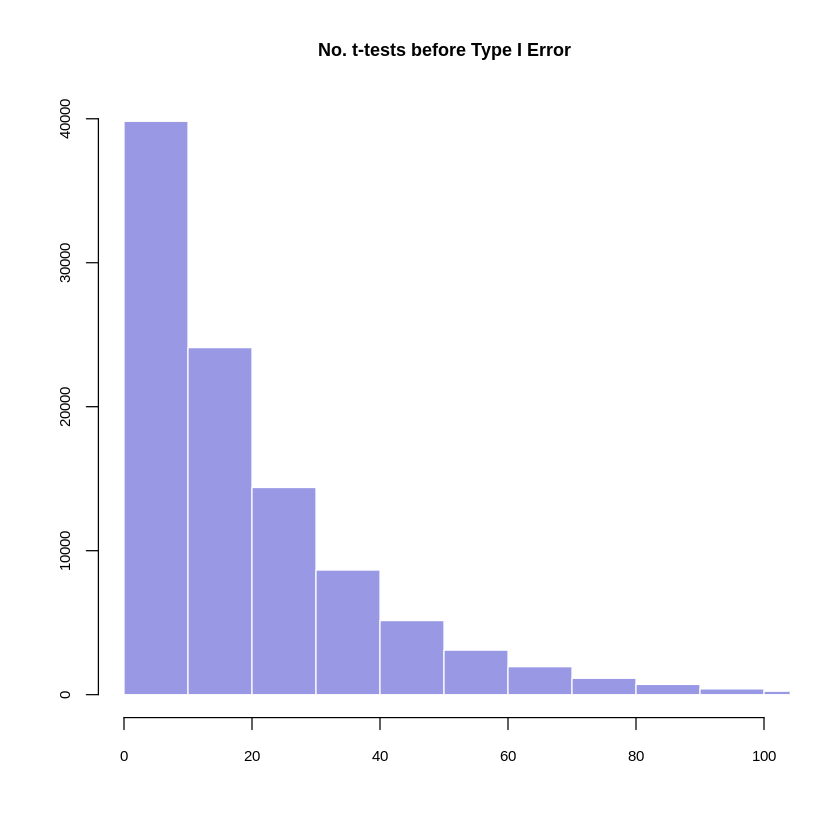

In [ ]:
set.seed(3141592)
# Vector containing number of draws before a spurious p-value:
firsthackingop <- 0
for(i in 1:1e5){
hackingwait <- 1 # Counter for num draws before success (at least 1)
  repeat{
  x=rnorm(100, 0, 1) # Draw from H0
  if(t.test(x, mu=0)$p.value > 0.05){hackingwait=hackingwait+1}else{break}
}
firsthackingop[i] <- hackingwait
}

# Stats on results:
mean(firsthackingop)
median(firsthackingop)
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
Mode(firsthackingop)


hist(firsthackingop, freq = T, main = "No. t-tests before Type I Error",
          xlim=c(0,100), col = rgb(.2,.2,.8,.5), border = F,
          cex.axis=.75, cex.main=.9, xlab="", ylab="")